<a href="https://colab.research.google.com/github/JairEsc/Fordecyt/blob/main/Tipos_materiales_logaritmizacion_normalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
Data=pd.read_excel("BASE_REA.xlsx",)
Data['ID']=np.arange(2,len(Data)+2)#Para que coincida.

In [5]:
Base=(Data[["CLASIFICAC", "C/VR"]])

Campos_distintos:  ['Compuestos farmaceuticos', 'Drogas ilegales', 'Disrupcien endocrina', 'Fermaco de uso habitual', 'Pategenos emergentes', 'Plaguicidas', 'Plesticos', 'Alquilfenoles y otros compuestos orgenicos', 'Compuesto orgenico voletil', 'Metales pesados y compuestos organoestennicos', 'Hidrocarburos arometicos (HPA)', 'Fesico-quemicos', 'Gases Texicos', 'Material Particulado']
Numero de Campos_distintos:  14


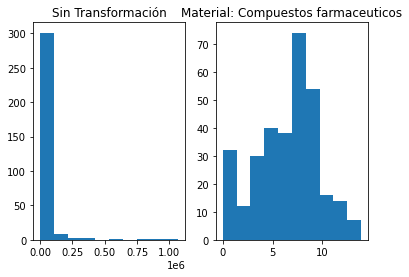

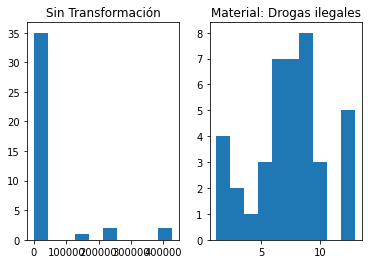

Para uno si sirve con p= 0.08630296587944031


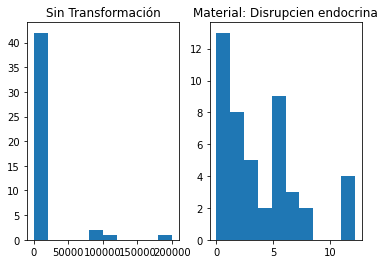

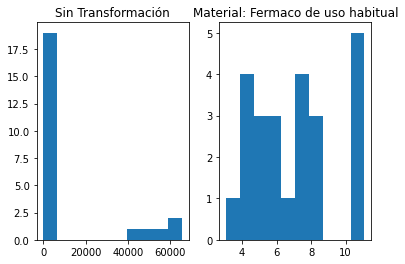

Para uno si sirve con p= 0.09186425805091858


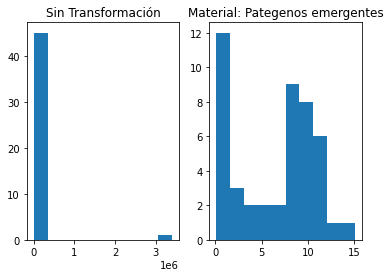

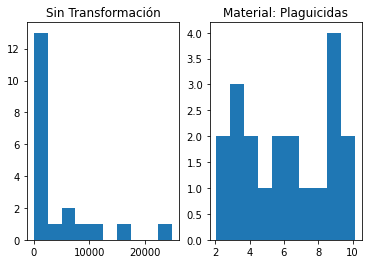

Para uno si sirve con p= 0.1402711421251297


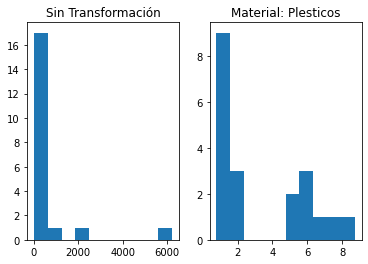

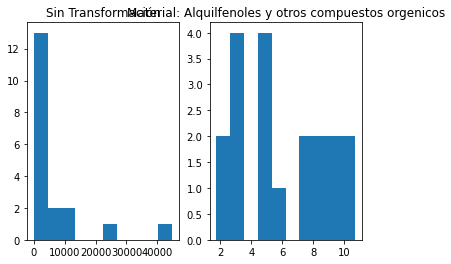

Para uno si sirve con p= 0.14370527863502502


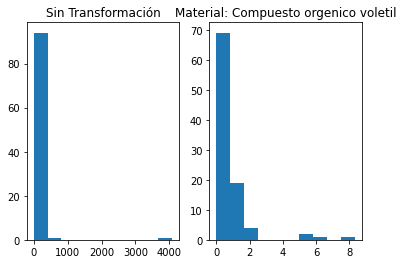

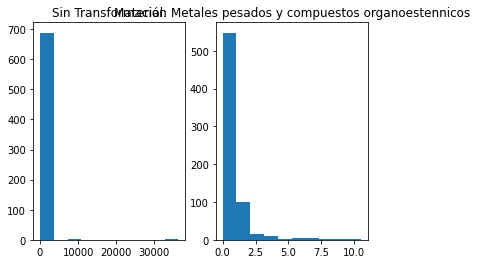

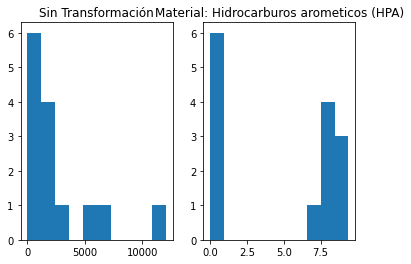

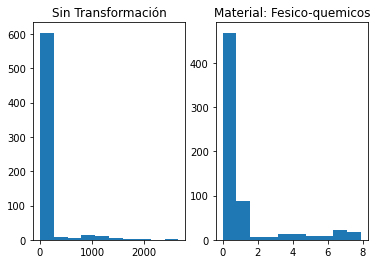

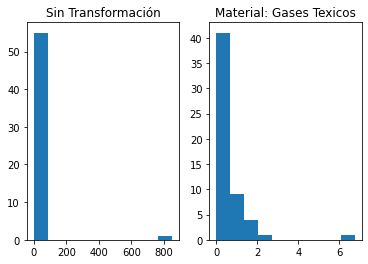

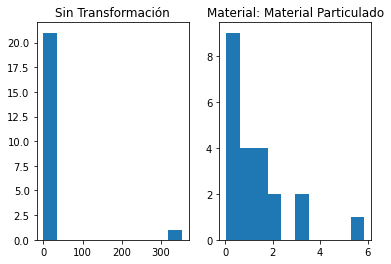

In [6]:
campos=Base['CLASIFICAC']
campos_distintos=[]
jala=[]
from scipy.stats import shapiro
for campo in campos:
    if campo not in campos_distintos:
        campos_distintos.append(campo)
print("Campos_distintos: ", campos_distintos)
print("Numero de Campos_distintos: ", len(campos_distintos))

for campo in campos_distintos:
    subset=Base[Base['CLASIFICAC']==campo]
    #print(subset)
    #Este subset es la base correspondiente a un tipo de material.
    figure, axis = plt.subplots(1, 2)
    axis[0].hist(subset['C/VR'])
    axis[0].set_title("Sin Transformación")
    transformados=np.log(subset['C/VR']+1)
    axis[1].hist(transformados)
    axis[1].set_title("Con Transformación")
    
    plt.title('Material: '+campo)
    plt.show()
    p1=shapiro(subset['C/VR']).pvalue
    p2=shapiro(transformados).pvalue
    if(p1>0.05):
        print("Para uno si servía")
        jala.append(campo)
    if(p2>0.05):
        jala.append(campo)##Después de la transformacion satisface la prueba de Shapiro
        print("Para uno si sirve con p=",p2)
    

In [7]:
#Nos concentramos en los que no fue suficiente con un log(1+x)
for s in jala:
    campos_distintos.remove(s)
campos_distintos

['Compuestos farmaceuticos',
 'Disrupcien endocrina',
 'Pategenos emergentes',
 'Plesticos',
 'Compuesto orgenico voletil',
 'Metales pesados y compuestos organoestennicos',
 'Hidrocarburos arometicos (HPA)',
 'Fesico-quemicos',
 'Gases Texicos',
 'Material Particulado']

F  Compuestos farmaceuticos p:  9.241358153440175e-15


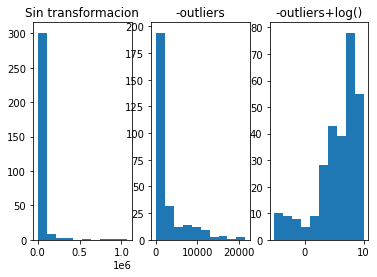

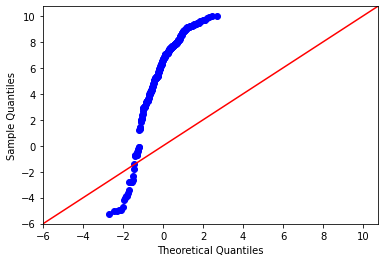

Disrupcien endocrina Basta con quitar outliers y aplicar log para p= 0.0341118723154068


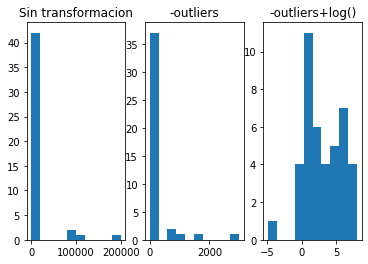

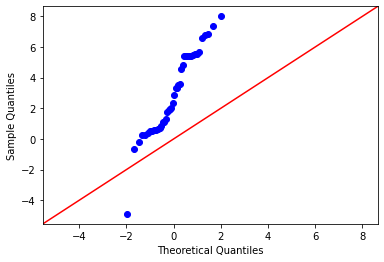

F  Pategenos emergentes p:  0.0002806848497129977


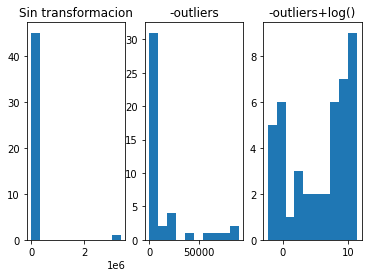

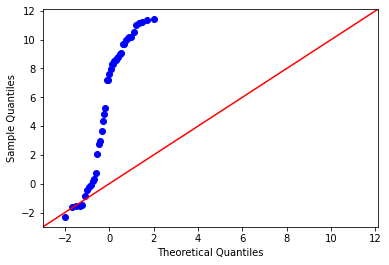

F  Plesticos p:  0.0003523782652337104


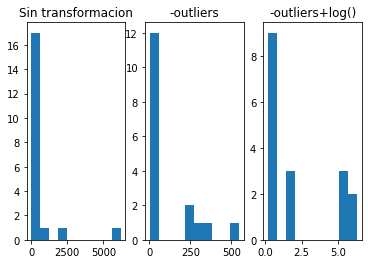

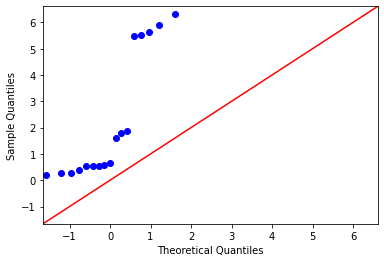

F  Compuesto orgenico voletil p:  0.0002529964840505272


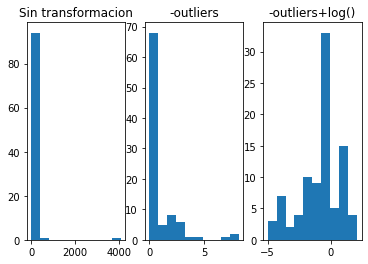

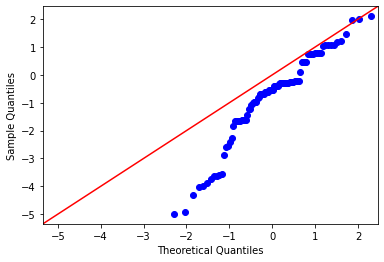

F  Metales pesados y compuestos organoestennicos p:  6.515771255877212e-11


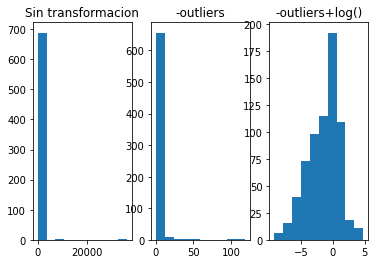

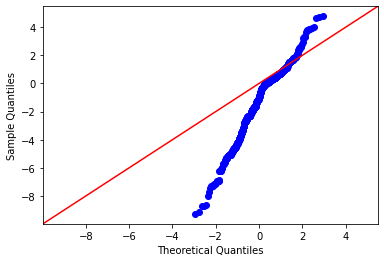

F  Fesico-quemicos p:  8.060300675111898e-17


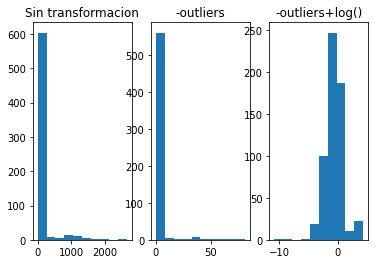

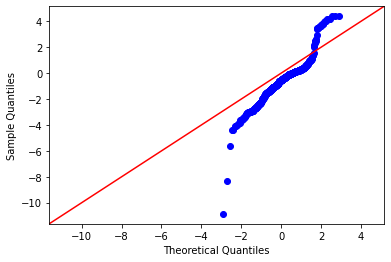

F  Gases Texicos p:  9.093753760680556e-06


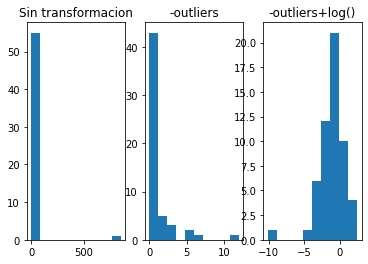

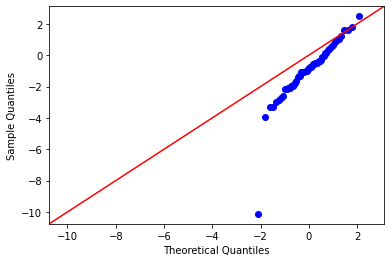

Material Particulado Basta con quitar outliers y aplicar log para p= 0.2956889867782593


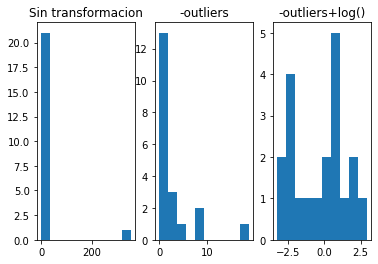

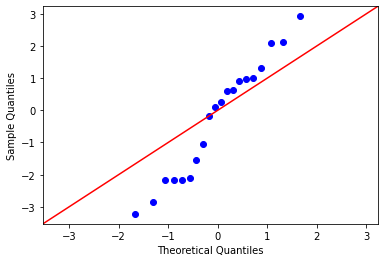

In [8]:
import statsmodels.api as sm
jala2=[]
for n in campos_distintos:
    intento=Base[Base['CLASIFICAC']==n]
    #plt.hist(intento.loc[intento['C/VR'] <np.mean(intento['C/VR'])]['C/VR'])#98% de los datos
    #plt.show()
    #plt.hist(np.log(metales.loc[metales['C/VR'] <np.mean(metales['C/VR'])]['C/VR']))#Quitando datos
    #plt.show()
    if(np.sum(intento['C/VR'] <np.mean(intento['C/VR']))/len(intento['C/VR'])>0.80):#Si el %90 de los datos está concentrado a la izquierda de la media,
    #Quitamos datos
        #print(n,"\n")
        #plt.hist(intento.loc[intento['C/VR'] <np.mean(intento['C/VR'])]['C/VR'])#98% de los datos
        figure, axis = plt.subplots(1, 3)
        axis[0].hist(intento['C/VR'])
        axis[0].set_title("Sin transformacion")
        sin_outliers=intento.loc[intento['C/VR'] <np.mean(intento['C/VR'])]['C/VR']
        axis[1].hist(sin_outliers)
        axis[1].set_title("-outliers")
        p3=shapiro(sin_outliers).pvalue#P valor quitando datos
        sin_outliers_y_log=np.log(intento.loc[intento['C/VR'] <np.mean(intento['C/VR'])]['C/VR'])
        axis[2].hist(sin_outliers_y_log)
        axis[2].set_title("-outliers+log()")
        p4=shapiro(sin_outliers_y_log).pvalue#P valor quitando datos y aplicando log.

        if(p3>0.01):
            print(n,"Basta con quitar outliers para p=",p3)
            jala2.append(campo)
        else:
            if(p4>0.01):
                print(n,"Basta con quitar outliers y aplicar log para p=",p4)
                jala2.append(campo)
            else:
                print("F ", n,"p: ",p4)
        plt.show()
        import statsmodels.api as sm
        sm.qqplot(sin_outliers_y_log, line ='45')
        plt.show()

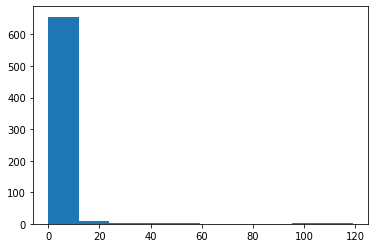

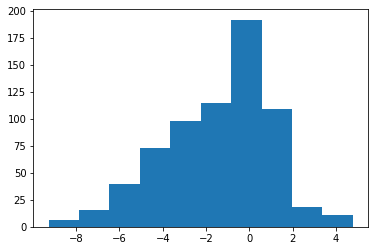

6.515771255877212e-11

In [9]:
metales=Base[Base['CLASIFICAC']=='Metales pesados y compuestos organoestennicos']
plt.hist(metales.loc[metales['C/VR'] <np.mean(metales['C/VR'])]['C/VR'])#98% de los datos
plt.show()
nueva=metales.loc[metales['C/VR'] <np.mean(metales['C/VR'])]['C/VR']
plt.hist(np.log(nueva))#Quitando datos
plt.show()
p3=shapiro(np.log(nueva)).pvalue
p3